## Building a simple Linear Regression Model using PyTorch

In [33]:
import numpy as np
import matplotlib.pyplot as plt

X_train = np.arange(10,dtype='float32').reshape(10,1)
y_train = np.array([1.0,1.3,3.1,2.0,5.0,6.3,6.6,7.4,8.0,9.0],dtype='float32')

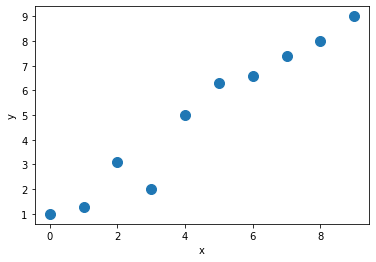

In [34]:
plt.plot(X_train,y_train,'o',markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [35]:
import torch
from torch.utils.data import Dataset,TensorDataset

X_train_norm = (X_train - np.mean(X_train))/np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train)

train_ds = TensorDataset(X_train_norm,y_train)


In [53]:
from torch.utils.data import DataLoader

batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

next(iter(train_dl))

[tensor([[-1.2185]]), tensor([1.3000])]

In [72]:
torch.manual_seed(1)

# Intialize params

weight = torch.randn(1)
weight.requires_grad_()

bias = torch.zeros(1,requires_grad = True)

learning_rate = 0.001

num_epochs = 100

log_epochs = 10

In [74]:
# Define our model as y = mx+b

def model(x):
    return (weight*x) + bias

def loss_fn(input,target):
    return (input-target).pow(2).mean()

for epoch in range(num_epochs):
    for x_batch,y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
#     print(f'before1 : {weight}')
    with torch.no_grad():
        weight -= weight.grad*learning_rate
        bias -= bias.grad*learning_rate
        weight.grad.zero_()
        bias.grad.zero_()
#     print(f'after : {weight}')
#     print(f'Epoch {epoch} Loss {loss.item():.4f}')
    if epoch % log_epochs==0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')


Epoch 0 Loss 0.7625
Epoch 10 Loss 1.0024
Epoch 20 Loss 0.0232
Epoch 30 Loss 0.5138
Epoch 40 Loss 0.0741
Epoch 50 Loss 1.8712
Epoch 60 Loss 0.0007
Epoch 70 Loss 0.0850
Epoch 80 Loss 0.0634
Epoch 90 Loss 0.0012


In [75]:
print('Final parameters: ', weight.item(),bias.item())

Final parameters:  2.670930862426758 4.88258695602417


In [78]:
X_test = np.linspace(0,9,num=100,dtype='float32').reshape(-1,1)

X_test_norm = (X_test - np.mean(X_test))/np.std(X_test)
X_test_norm = torch.from_numpy(X_test_norm)

In [79]:
y_pred = model(X_test_norm).detach().numpy()

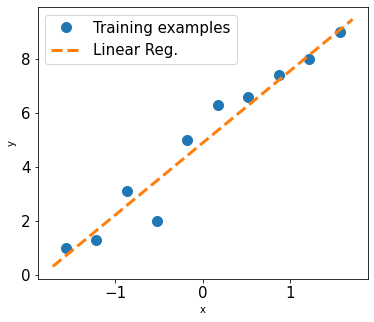

In [80]:
fig = plt.figure(figsize=(13,5))
ax = fig.add_subplot(1,2,1)

plt.plot(X_train_norm,y_train,'o',markersize=10)
plt.plot(X_test_norm,y_pred,'--', lw=3)

plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.tick_params(axis='both',which='major',labelsize=15)
plt.show()

## Using torch.nn and torch.optim modules 

In [84]:
import torch.nn as nn

loss_fn = nn.MSELoss(reduction = 'mean')

input_size=1
output_size=1

model = nn.Linear(input_size, output_size)
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for epoch in range(num_epochs):
    for x_batch,y_batch in train_dl:
        
        # Generate predictions
        pred = model(x_batch)
        
        # Calculate Loss
        loss = loss_fn(pred, y_batch)
        
        # compute gradeints
        loss.backward()
        
        # update weights & gradients
        optimizer.step()
        
        # Reset gradients to zero for next epoch
        optimizer.zero_grad()

    if epoch % log_epochs==0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 40.1854
Epoch 10 Loss 49.0121
Epoch 20 Loss 32.2643
Epoch 30 Loss 8.3398
Epoch 40 Loss 0.0416
Epoch 50 Loss 8.9466
Epoch 60 Loss 0.0064
Epoch 70 Loss 5.0806
Epoch 80 Loss 1.8993
Epoch 90 Loss 1.8198


In [85]:
print('Final parameters: ', weight.item(),bias.item())

Final parameters:  2.670930862426758 4.88258695602417
